In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('movies.csv')

In [3]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
# number of rows and columns in the data frame
movies_data.shape

(4803, 24)

In [5]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [6]:
# replacing the null valuess with null string
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [7]:
# combining all the 5 selected features
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
combined_features   #concatenating above 5 series 

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [8]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [9]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [10]:
print(feature_vectors)
# "(sentence_index, feature_index) count"

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [11]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [12]:
print(similarity.shape)

(4803, 4803)


In [13]:
def recommend_movies_by_title(movie_name, num_recommendations=10):
    list_of_all_titles = movies_data['title'].tolist()

    find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

    if not find_close_match:
        print("No close match found for your input.")
        return

    close_match = find_close_match[0]

    index_of_the_movie = movies_data[movies_data['title'] == close_match].index[0]

    similarity_score = list(enumerate(similarity[index_of_the_movie]))

    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    print('Movies suggested for you:\n')

    for i, movie in enumerate(sorted_similar_movies[:num_recommendations]):
        index = movie[0]
        title_from_index = movies_data.iloc[index]['title']
        print(f"{i + 1}. {title_from_index}")

# User input for movie recommendations
movie_name = input('Enter your favorite movie name: ')
recommend_movies_by_title(movie_name)

Movies suggested for you:

1. Deadpool
2. The Incredible Hulk
3. Iron Man 2
4. X-Men
5. Avengers: Age of Ultron
6. X-Men: Apocalypse
7. Ant-Man
8. The Avengers
9. Thor: The Dark World
10. X2


In [14]:
# Get user input for a single genre
user_genre = input('Enter a genre (e.g., action, adventure): ')

# Filter movies based on the user's genre input
filtered_movies = movies_data[movies_data['genres'].str.lower().str.contains(user_genre.lower(), case=False)]

if filtered_movies.empty:
    print(f"No movies found for the specified genre: {user_genre}.")
else:
    # Get movie suggestions for the selected genre
    similar_movies = []

    for index, row in filtered_movies.iterrows():
        movie_name = row['title']
        index_of_the_movie = row['index']
        similarity_score = list(enumerate(similarity[index_of_the_movie]))
        sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similar_movies.extend([(movie_name, movies_data.iloc[i]['title']) for i, _ in sorted_similar_movies])

    # Sort the list of similar movies by similarity score
    similar_movies.sort(key=lambda x: x[1], reverse=True)

    print(f'Movies suggested for you based on the genre: {user_genre}')
    i = 1

    for movie in similar_movies:
        if i < 30:
            print(i, '.', movie[0])
            i += 1

Movies suggested for you based on the genre: Adventure Fantasy Action
1 . Pirates of the Caribbean: At World's End
2 . Superman Returns
3 . Pirates of the Caribbean: Dead Man's Chest
4 . Prince of Persia: The Sands of Time
5 . The Hobbit: An Unexpected Journey
6 . Night at the Museum: Battle of the Smithsonian
7 . Thor
8 . Pirates of the Caribbean: The Curse of the Black Pearl
9 . Clash of the Titans
10 . The 13th Warrior
11 . Fantastic 4: Rise of the Silver Surfer
12 . The Lord of the Rings: The Fellowship of the Ring
13 . The Fifth Element
14 . The Lord of the Rings: The Return of the King
15 . The Lord of the Rings: The Two Towers
16 . Lara Croft: Tomb Raider
17 . Conan the Barbarian
18 . Last Action Hero
19 . The Brothers Grimm
20 . Mystery Men
21 . In the Name of the King: A Dungeon Siege Tale
22 . The Warrior's Way
23 . The Shadow
24 . Cirque du Freak: The Vampire's Assistant
25 . The Borrowers
26 . Conan the Destroyer
27 . Red Sonja
28 . Pirates of the Caribbean: At World's End


C:\Users\jaisw\AppData\Local\Temp\ipykernel_12648\135094015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres['title'], y=top_10_genres['vote_average'], palette='magma')


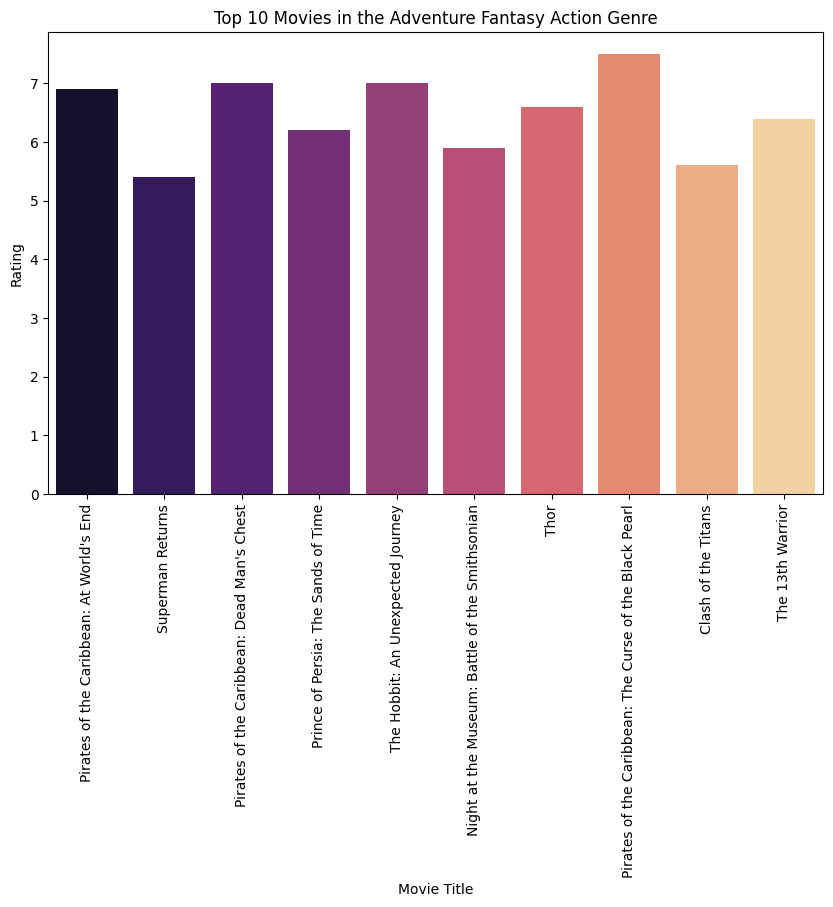

In [15]:
# Visualize the top 10 rows of data for the selected genre
top_10_genres = filtered_movies.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres['title'], y=top_10_genres['vote_average'], palette='magma')
plt.title(f'Top 10 Movies in the {user_genre} Genre')
plt.xlabel('Movie Title')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()

In [17]:
# Listing the Title based on Director
movie_director = input(' Enter your favourite Director name : ')

list_of_same_director = movies_data['director']==movie_director
list_of_all_titles = movies_data[list_of_same_director]

if list_of_all_titles.empty:
    print(f"No movies found directed by {movie_director}.")
else:
    print('Movies directed by Andrew Stanton : \n')
    L = list_of_all_titles['title'].tolist()
    i = 1
    for item in L:
        print(i, '.',item,end="\n")
        i+=1

Movies directed by Andrew Stanton : 

1 . John Carter
2 . WALL·E
3 . Finding Nemo
4 . A Bug's Life


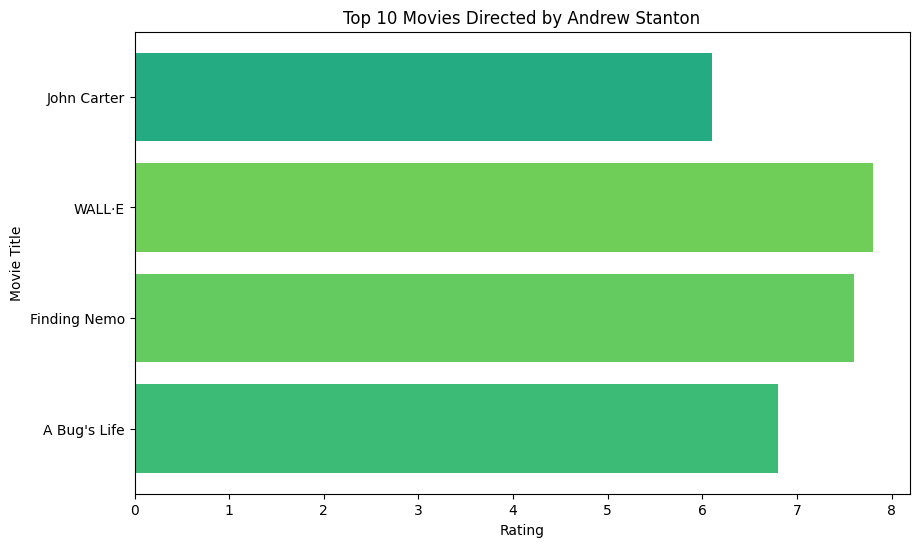

In [18]:
top_10_director_movies = list_of_all_titles.head(10)

if not top_10_director_movies.empty:
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(top_10_director_movies['vote_average'] / 10.0)  # Color based on rating

    plt.barh(top_10_director_movies['title'], top_10_director_movies['vote_average'], color=colors)
    plt.title(f'Top 10 Movies Directed by {movie_director}')
    plt.xlabel('Rating')
    plt.ylabel('Movie Title')
    plt.gca().invert_yaxis()  # Invert the order to show the highest rated at the top
    plt.show()

In [25]:
# Listing the Title based on Average Vote
movie_rating = float(input(' Enter your Movie Rating Preferences between (0 - 10) : '))

list_of_similar_rating = movies_data['vote_average']>=movie_rating
list_of_all_titles = movies_data[list_of_similar_rating]

if list_of_all_titles.empty:
    print(f"No movies found within the specified vote average range.")
else:
    print("Movie Rating greater than or equal to",movie_rating,": \n")
    L = list_of_all_titles['title'].tolist()    
    i = 1
    for item in L:
        print(i, '.',item,end="\n")
        i+=1

Movie Rating greater than or equal to 8.5 : 

1 . The Shawshank Redemption
2 . One Man's Hero
3 . There Goes My Baby
4 . Stiff Upper Lips
5 . Sardaarji
6 . Dancer, Texas Pop. 81
7 . Me You and Five Bucks
8 . Little Big Top


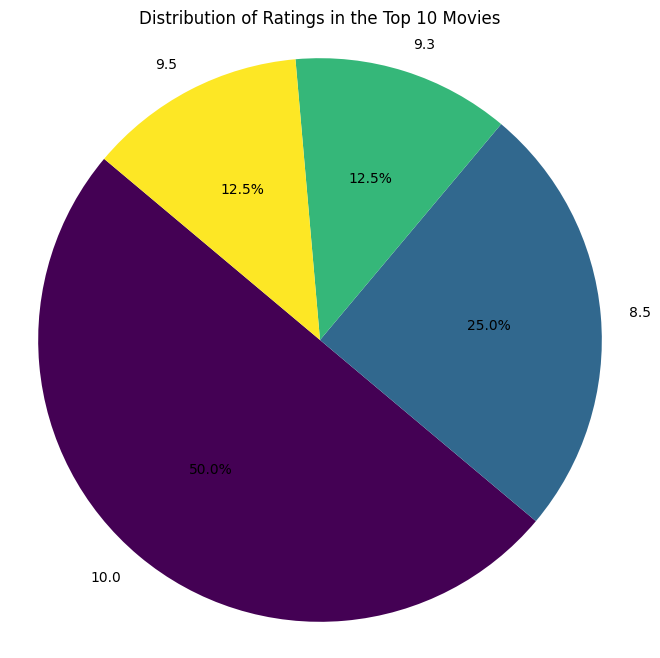

In [26]:
top_10_rating_movies = list_of_all_titles.head(10)

if not top_10_rating_movies.empty:
    plt.figure(figsize=(8, 8))
    
    # Count the number of movies in different rating categories
    rating_counts = top_10_rating_movies['vote_average'].value_counts()
    
    # Create the pie chart
    labels = rating_counts.index
    sizes = rating_counts.values
    colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Ratings in the Top 10 Movies')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [70]:
# Get user input for budget range
min_budget = float(input('Enter minimum budget: '))
max_budget = float(input('Enter maximum budget: '))

# Filter movies based on budget range
filtered_movies = movies_data[(movies_data['budget'] >= min_budget) & (movies_data['budget'] <= max_budget)]

if filtered_movies.empty:
    print("No movies found within the specified budget range.")
else:
    # Get movie suggestions for the selected budget range
    similar_movies = []

    for index, row in filtered_movies.iterrows():
        movie_name = row['title']
        index_of_the_movie = row['index']
        similarity_score = list(enumerate(similarity[index_of_the_movie]))
        sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        similar_movies.extend([(movie_name, movies_data.iloc[i]['title']) for i, _ in sorted_similar_movies])

    # Sort the list of similar movies by similarity score
    similar_movies.sort(key=lambda x: x[1], reverse=True)

    print('Movies suggested for you based on the budget range:')
    i = 1

    for movie in similar_movies:
        if i < 30:
            print(i, '.', movie[0])
            i += 1

Movies suggested for you based on the budget range:
1 . Avatar
2 . Pirates of the Caribbean: At World's End
3 . Spectre
4 . The Dark Knight Rises
5 . John Carter
6 . Spider-Man 3
7 . Tangled
8 . Avengers: Age of Ultron
9 . Harry Potter and the Half-Blood Prince
10 . Batman v Superman: Dawn of Justice
11 . Superman Returns
12 . Quantum of Solace
13 . Pirates of the Caribbean: Dead Man's Chest
14 . The Lone Ranger
15 . Man of Steel
16 . The Chronicles of Narnia: Prince Caspian
17 . The Avengers
18 . Men in Black 3
19 . The Hobbit: The Battle of the Five Armies
20 . The Amazing Spider-Man
21 . Robin Hood
22 . The Hobbit: The Desolation of Smaug
23 . King Kong
24 . Titanic
25 . Captain America: Civil War
26 . Battleship
27 . Skyfall
28 . Spider-Man 2
29 . Iron Man 3


C:\Users\jaisw\AppData\Local\Temp\ipykernel_2824\3276899852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_budget_movies['title'], y=top_10_budget_movies['budget'] / 1e6, palette='coolwarm')


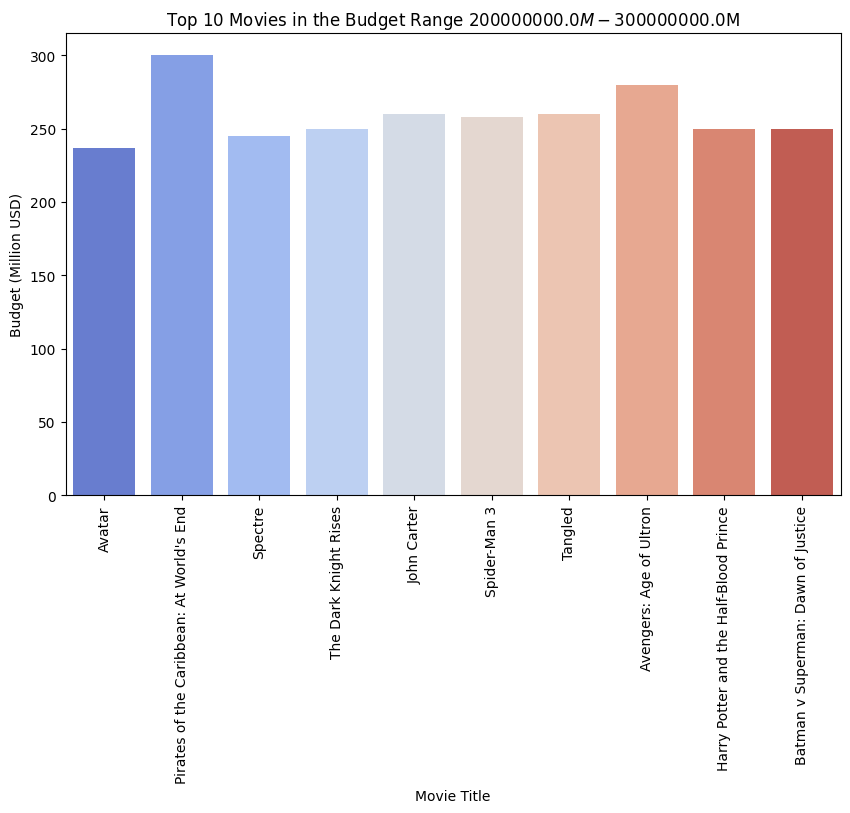

In [71]:
# Visualize the top 10 rows of data for the selected budget range
top_10_budget_movies = filtered_movies.head(10)

if not top_10_budget_movies.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_budget_movies['title'], y=top_10_budget_movies['budget'] / 1e6, palette='coolwarm')
    plt.title(f'Top 10 Movies in the Budget Range ${min_budget}M - ${max_budget}M')
    plt.xlabel('Movie Title')
    plt.xticks(rotation=90)
    plt.ylabel('Budget (Million USD)')
    plt.show()

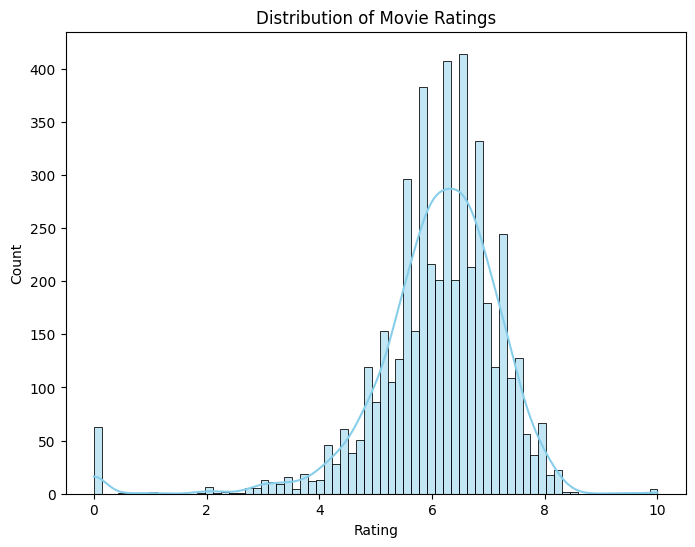

In [58]:
# Visualize the distribution of movie ratings
plt.figure(figsize=(8, 6))
sns.histplot(movies_data['vote_average'], kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()